# Import library

In [1]:
import numpy as np
import pandas as pd
import os
import torch

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

from common import (ImageLoader, AlexNetwork, ImageAgeDataset,
                    train, valid, pred, device, activate)

# Create dataset

In [2]:
filepaths = []
agegroup = []
group_encode = {"25-30": 0, "30-35": 1,
                "35-40": 2, "40-45": 3, "45-50": 4, "50-55": 5}
for path in os.listdir("../../CleanData/"):
  for x in os.listdir(f"../../CleanData/{path}/"):
    filepaths.append(f"../../CleanData/{path}/{x}")
    agegroup.append(group_encode[path])

In [3]:
images = pd.concat(
    [pd.Series(filepaths, name="Filepath"), pd.Series(agegroup, name="Group")],
    axis=1).sample(
    frac=1.0, random_state=1).reset_index(
    drop=True)

In [4]:
images

,Filepath,Group
0,../CleanData/25-30/7.jpg,0
1,../CleanData/35-40/92.jpg,2
2,../CleanData/35-40/53.jpg,2
3,../CleanData/35-40/4.jpg,2
4,../CleanData/30-35/109.jpg,1
...,...,...
370,../CleanData/30-35/81.jpg,1
371,../CleanData/35-40/35.jpg,2
372,../CleanData/25-30/74.jpg,0
373,../CleanData/35-40/17.jpg,2


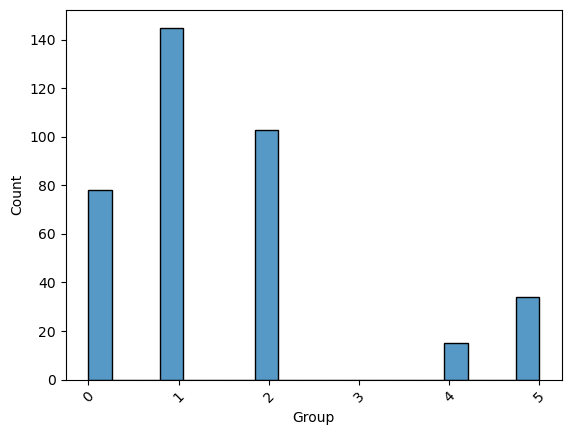

In [5]:
sns.histplot(images.Group)
plt.xticks(rotation = 45)
plt.show()

# Split dataset

In [6]:
trainset, testset = train_test_split(images, test_size = 0.1, random_state = 42)
trainset, validset = train_test_split(trainset, test_size = 0.2, random_state = 42)

In [7]:
train_dataloader = ImageLoader(trainset, shuffle=True, num_workers=8)
valid_dataloader = ImageLoader(validset, shuffle=False, num_workers=8)

# Model

## Init

In [8]:
model = AlexNetwork(6)
model.to(device)

AlexNetwork(
  (conv_1): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(50, 50))
  (pool_1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_2): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool_2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_3): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_4): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_5): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool_3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (nn): Sequential(
    (0): Linear(in_features=9216, out_features=4096, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4096, out_features=4096, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4096, out_features=6, bias=True)
  )
)

In [9]:
LR = 1e-2
N_EPOCH = 20
EARLY_STOP = 3

In [10]:
optimizer = torch.optim.Adam(params = model.parameters(), lr = LR)

## Train

In [11]:
train_losses = []
valid_losses = []
min_valid_loss = np.inf
patience = 0
for epoch in range(N_EPOCH):
  print(f"EPOCH = {epoch}")

  train_loss, train_acc = train(model, optimizer, train_dataloader)
  train_losses.append(train_loss)
  print(f"train_loss = {train_loss}, accuracy = {train_acc}")

  valid_loss, valid_acc = valid(model, valid_dataloader)
  valid_losses.append(valid_loss)
  print(f"valid_loss = {valid_loss}, accuracy = {valid_acc}")
  print("======================================")
  if valid_loss > min_valid_loss:
    patience += 1
  else:
    min_valid_loss = valid_loss
    patience = 0

  if patience > EARLY_STOP:
    print(f'EARLY STOPPING AT EPOCH = {epoch}')
    N_EPOCH = epoch
    break

EPOCH = 0


100%|██████████| 269/269 [00:18<00:00, 14.93it/s]


train_loss = 1.1682114182968583e+21, accuracy = 0.2825278810408922


100%|██████████| 68/68 [00:08<00:00,  8.38it/s]


valid_loss = 2.323924341622521, accuracy = 0.35294117647058826
EPOCH = 1


100%|██████████| 269/269 [00:18<00:00, 14.82it/s]


train_loss = 1.9918428431213124, accuracy = 0.26394052044609667


100%|██████████| 68/68 [00:07<00:00,  9.30it/s]


valid_loss = 2.1231085254865536, accuracy = 0.2647058823529412
EPOCH = 2


100%|██████████| 269/269 [00:18<00:00, 14.82it/s]


train_loss = 1.7722406710833865, accuracy = 0.3308550185873606


100%|██████████| 68/68 [00:07<00:00,  9.51it/s]


valid_loss = 2.078530458843007, accuracy = 0.35294117647058826
EPOCH = 3


100%|██████████| 269/269 [00:17<00:00, 15.12it/s]


train_loss = 1.7435408332090838, accuracy = 0.38661710037174724


100%|██████████| 68/68 [00:07<00:00,  9.55it/s]


valid_loss = 1.7263763354105108, accuracy = 0.2647058823529412
EPOCH = 4


100%|██████████| 269/269 [00:17<00:00, 15.13it/s]


train_loss = 1.5614594467067364, accuracy = 0.37174721189591076


100%|██████████| 68/68 [00:06<00:00,  9.85it/s]


valid_loss = 1.8119616999345667, accuracy = 0.35294117647058826
EPOCH = 5


100%|██████████| 269/269 [00:17<00:00, 15.18it/s]


train_loss = 1.5764442685589914, accuracy = 0.3754646840148699


100%|██████████| 68/68 [00:06<00:00,  9.89it/s]


valid_loss = 1.7679509538061478, accuracy = 0.2647058823529412
EPOCH = 6


100%|██████████| 269/269 [00:17<00:00, 15.19it/s]


train_loss = 1.6138815662674744, accuracy = 0.3159851301115242


100%|██████████| 68/68 [00:06<00:00,  9.88it/s]


valid_loss = 1.8542615560924305, accuracy = 0.35294117647058826
EPOCH = 7


100%|██████████| 269/269 [00:17<00:00, 15.10it/s]


train_loss = 1.6768822782987998, accuracy = 0.34572490706319703


100%|██████████| 68/68 [00:06<00:00,  9.84it/s]

valid_loss = 1.9282465138856102, accuracy = 0.2647058823529412
EARLY STOPPING AT EPOCH = 7


## Save model

In [12]:
torch.save({
    "epoch": N_EPOCH,
    "model": model.state_dict(),
    "early stop": EARLY_STOP,
    "optimizer_state_dict": optimizer.state_dict(),
    "loss": train_losses,
    "learning_rate": LR,
}, "age.pt")

# Predict

## Load model

In [13]:
model = AlexNetwork(6)
model.load_state_dict(torch.load("age.pt")["model"])

<All keys matched successfully>

## Create test set

In [14]:
test_dataset = ImageAgeDataset(testset)

In [15]:
predict = np.empty((testset.shape[0], 2), dtype=np.int64)
for id in range(testset.shape[0]):
  y_hat_id = activate(model(test_dataset[id]["x"]))
  predict[id][0] = pred(y_hat_id)
  predict[id][1] = test_dataset[id]["y"].item()


## Accuracy

In [30]:
baseline = np.max(np.unique(predict[:, 1], return_counts=True)[1])/ predict.shape[0] * 100
accuracy = np.sum(predict[:, 0] == predict[:, 1])/ predict.shape[0] * 100
print(f"The accuracy of model is {np.round(accuracy, 2)}, while baseline is {np.round(baseline, 2)}")

The accuracy of model is 31.58, while baseline is 39.47
